# Officious Ox(en): Food Bank Partnerships with Local Restaurants

# Purpose

We are looking to make partnerships between the Los Angeles Regional Food Bank and local food providers to increase health outcomes for their users and decrease food waste.

One of the problems that foodbanks encounter is the distribution of their resources is uneven, they don’t always have certain quality food items in stock, and this causes health disparities for the people that rely on the food banks the most.

Another macro problem that we saw was that across the U.S. there is extreme food waste. When there are 15 million food insecure Americans, nutritional deficiencies can cause large healthcare costs for induviduals. When we saw there was huge percentage of food waste, we knew we wanted to bridge the gap between those two issues by making partnership through an app.  This is the analysis and our findings of the 

## Importing the Dependencies, Wrappers, and API Keys

In [1]:
import pandas as pd
import os
import requests
from api_key import api_key, Client_ID, g_key
import numpy as np

from geopy.geocoders import Nominatim
geolocator = Nominatim()

import warnings
warnings.filterwarnings('ignore')

import gmaps
gmaps.configure(api_key=g_key)

import matplotlib.pyplot as plt
%matplotlib notebook

C:\Users\Ayman\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


## Making the Yelp Wrapper

### Yelp API Wrapper

In [2]:
# Yelp api
import requests
import json
from pprint import pprint
from yelp.client import Client
# from yelp_api_key import yelp_client_id
# from yelp_api_key import yelp_api_key
from urllib.parse import quote
API_KEY = api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  

# DEFAULT_TERM = 'supermarket'
DEFAULT_LOCATION = '1734 E 41st St, Los Angeles, CA 90058'
# DEFAULT_DISTANCE = 5
SEARCH_LIMIT = 50

def request(host, path, api_key, url_params=None):
    
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }
    print(u'Querying {0} ...'.format(url))
    response = requests.request('GET', url, headers=headers, params=url_params)
    return response.json()

### Obtaining the Restaurant Data

In [3]:
API_KEY = api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  

RESTAURANT_TERM = 'restaurants'
DEFAULT_LOCATION = '1734 E 41st St, Los Angeles, CA 90058'

restaurant_response = request(host=API_HOST,
                  path=SEARCH_PATH,
                  api_key=API_KEY,
                  url_params={"location":DEFAULT_LOCATION, "term":RESTAURANT_TERM, "limit": SEARCH_LIMIT})

# pprint(restaurant_response, indent=4) # This has been commented out since it would take up all 90% of the 
                                        # notebook, I assure you this works

Querying https://api.yelp.com/v3/businesses/search ...


### Obtaining the Grocery Store Data

In [4]:
API_KEY = api_key
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  

SUPERMARKET_TERM = 'Supermarket'
DEFAULT_LOCATION = '1734 E 41st St, Los Angeles, CA 90058'

supermarket_response = request(host=API_HOST,
                  path=SEARCH_PATH,
                  api_key=API_KEY,
                  url_params={"location":DEFAULT_LOCATION, "term":SUPERMARKET_TERM, "limit": SEARCH_LIMIT})

# pprint(supermarket_response, indent=4) # This has been commented out since it would take up all 90% of the 
                                         # notebook, I assure you this works

Querying https://api.yelp.com/v3/businesses/search ...


## Creating the Pandas DataFrame

### Restaurants DataFrames

In [5]:
r_lat = []
r_lon = []
restaurant = []
r_cuisine = []
r_price = []
r_rating = []
r_address = []
r_delivery = []
r_review_count = []


for i in range(50):
    try:
        # Obtaining the supermarket business name
        restaurant.append(restaurant_response['businesses'][i]['name'])
        
        # Obtaining the Latitude 
        r_lat.append(restaurant_response["businesses"][i]["coordinates"]["latitude"])
        
        # Obtaining the Longitude
        r_lon.append(restaurant_response["businesses"][i]["coordinates"]["longitude"])
        
        # Obtaining the Address of the business name
        r_address.append(restaurant_response['businesses'][i]['location']['address1'])
        
        # Obtaining the Rating of the business
        r_rating.append(restaurant_response['businesses'][i]['rating'])
        
        # Obtaining the number of reviews of the supermarket 
        r_review_count.append(restaurant_response['businesses'][i]['review_count'])
        
        # Obtaining the delivery that the supermarket can do
        r_delivery.append(restaurant_response['businesses'][i]['transactions'])
        
        # Obtaining the price value in terms of '$'
        r_price.append(restaurant_response['businesses'][i]['price'])
        
    except:
        r_price.append(np.NaN)
        pass
    
    try:
        # Obtaining the Address of the business cuisine
        r_cuisine.append(restaurant_response['businesses'][i]['categories'][0]['title'])
    except:
        pass
    
    continue


print(f"length of restaurants name :{len(restaurant)}")
print(f"length of cuisine : {len(r_cuisine)}")
print(f"length of lat :{len(r_lat)}")
print(f"length of lon :{len(r_lon)}")
print(f"length of price :{len(r_price)}") 
print(f"length of rating  :{len(r_rating)}")
print(f"length of addresses :{len(r_address)}")
print(f"length of delivery :{len(r_delivery)}")
print(f"length of review_count :{len(r_review_count)}")


length of restaurants name :50
length of cuisine : 50
length of lat :50
length of lon :50
length of price :50
length of rating  :50
length of addresses :50
length of delivery :50
length of review_count :50


In [6]:
# To get the distance of each restaurant, the pythagoras theorm is implemented.

# I figured that the curvature of the earth would be negligible as
# we are only looking at one foodbank within a desired radius(5 miles) within Los Angeles.

# This was done by obtaining the finding the difference between the foobank coordinates and the 
# restaurant coordinates.  The lat was squared and lon was squared, the sum of the two had been found
# and rooted.  This would give a value in degrees and needs to be multiplied by 60 since (1/60) degrees = 1 mile

r_distance = []

foodbank_address = '1734 E 41st St, Los Angeles, CA 90058'

foodbank_loc = geolocator.geocode(foodbank_address)

foodbank_loc_lat = foodbank_loc.latitude

foodbank_loc_lon = foodbank_loc.longitude

for i in range(50):
    a = np.abs(foodbank_loc_lat-r_lat[i])
    b = np.abs(foodbank_loc_lon-r_lon[i])
    c = np.sqrt(a**2 + b**2)
    dis = c *60
    r_distance.append(round(dis,3))
print(f"length of distance :{len(r_distance)}")

length of distance :50


In [7]:
# Compiling the restaurant data into a dataframe and exporting the dataframe to a csv file

restaurant_data = {"Restaurant": restaurant,
              "Address": r_address,
              "Latitude": r_lat,
              "Longitude": r_lon,
              "Distance(mi)": r_distance,
              "Cuisine": r_cuisine,
              "Rating": r_rating,
              "Review": r_review_count,
              "Delivery": r_delivery,
              "Price": r_price
              }

restaurant_df = pd.DataFrame(restaurant_data)
restaurant
restaurant_df.to_csv('restaurant_df.csv', index=False)
restaurant_df.head()
restaurant_df.Price.value_counts()


$$      29
$$$      6
$        2
$$$$     2
Name: Price, dtype: int64

### Grocery Stores DataFrame

In [8]:
s_lat = []
s_lon = []
supermarket = []
s_price = []
s_rating = []
s_address = []
s_delivery = []
s_review_count = []


for i in range(50):
    try:
        # Obtaining the supermarket business name
        supermarket.append(supermarket_response['businesses'][i]['name'])
        
        # Obtaining the Latitude 
        s_lat.append(supermarket_response["businesses"][i]["coordinates"]["latitude"])
        
        # Obtaining the Longitude
        s_lon.append(supermarket_response["businesses"][i]["coordinates"]["longitude"])
        
        # Obtaining the Address of the business name
        s_address.append(supermarket_response['businesses'][i]['location']['address1'])
        
        # Obtaining the Rating of the business
        s_rating.append(supermarket_response['businesses'][i]['rating'])
        
        # Obtaining the number of reviews of the supermarket 
        s_review_count.append(supermarket_response['businesses'][i]['review_count'])
        
        # Obtaining the delivery that the supermarket can do
        s_delivery.append(supermarket_response['businesses'][i]['transactions'])
        
        # Obtaining the price value in terms of '$'
        s_price.append(supermarket_response['businesses'][i]['price'])
        
    except:
        s_price.append(np.NaN)
        pass
    continue


print(f"length of supermarket name :{len(supermarket)}")    
print(f"length of lat :{len(s_lat)}")
print(f"length of lon :{len(s_lon)}")
print(f"length of price :{len(s_price)}") 
print(f"length of rating  :{len(s_rating)}")
print(f"length of addresses :{len(s_address)}")
print(f"length of delivery :{len(s_delivery)}")
print(f"length of review_count :{len(s_review_count)}")

length of supermarket name :50
length of lat :50
length of lon :50
length of price :50
length of rating  :50
length of addresses :50
length of delivery :50
length of review_count :50


In [9]:
# Compiling the supermarket data into a dataframe and exporting the dataframe to a csv file

supermarket_data = {"Supermarket": supermarket,
              "Address": s_address,
              "Latitude": s_lat,
              "Longitude": s_lon,
              "Rating": s_rating,
              "Review": s_review_count,
              "Delivery": s_delivery,
              "Price": s_price
              }

supermarket_df = pd.DataFrame(supermarket_data)
supermarket_df.to_csv('supermarket_df.csv', index=False)
supermarket_df.head()

,Supermarket,Address,Latitude,Longitude,Rating,Review,Delivery,Price
0,Northgate Market,944 E Slauson Ave,33.988453,-118.258182,3.5,49,[],$
1,Marukai Market,123 S Onizuka St,34.050194,-118.242272,4.0,445,[],$$
2,Whole Foods Market,788 S Grand Ave,34.045876,-118.257620,3.5,613,[],$$
3,Ralphs,645 W 9th St,34.045670,-118.260825,3.5,503,[],$$
4,Galleria Market,3250 W Olympic Blvd,34.052344,-118.308386,4.0,241,[],$$


## Filtering the Data 

### Finding the radius around the foodbank

In [10]:
# Finding the exact coordinates of the foodbank

foodbank_address = '1734 E 41st St, Los Angeles, CA 90058'

foodbank_loc = geolocator.geocode(foodbank_address)

foodbank_loc_lat = foodbank_loc.latitude

foodbank_loc_lon = foodbank_loc.longitude

print(f"""
Food Bank Address: {foodbank_loc}

Food Bank Latitude: {foodbank_loc_lat}

Food Bank Longitude: {foodbank_loc_lon}
""")


Food Bank Address: 1734, East 41st Street, Vernon, Los Angeles County, California, 90058, United States of America

Food Bank Latitude: 34.00797331313131

Food Bank Longitude: -118.2422964040404



In [11]:
radius_miles = 5

rad_lat_for_df = [foodbank_loc_lat +(((np.cos(x))*radius_miles)/60) for x in np.arange(0,2*np.pi,0.1)]
rad_lon_for_df = [foodbank_loc_lon +(((np.sin(x))*radius_miles)/60) for x in np.arange(0,2*np.pi,0.1)]


radius_df = pd.DataFrame({'lat': rad_lat_for_df,
                          'lon': rad_lon_for_df})

centre_df = pd.DataFrame({'lat': [foodbank_loc_lat],
                       'lon': [foodbank_loc_lon]})
print(f"""
radius df: 
{radius_df}

centre_df:
{centre_df}

""")


radius df: 
          lat         lon
0   34.091307 -118.242296
1   34.090890 -118.233977
2   34.089646 -118.225741
3   34.087585 -118.217670
4   34.084728 -118.209845
..        ...         ...
58  34.081767 -118.281013
59  34.085263 -118.273453
60  34.087988 -118.265581
61  34.089912 -118.257477
62  34.091018 -118.249221

[63 rows x 2 columns]

centre_df:
         lat         lon
0  34.007973 -118.242296




### Filtering the restaurants data to find restaurants in a 5 mile radius in a DataFrame

In [12]:
mile_radius = 5
rad_lat = [foodbank_loc_lat +(((np.cos(x))*radius_miles/1.5)/60) for x in np.arange(0,2*np.pi,0.1)]
rad_lon = [foodbank_loc_lon +(((np.sin(x))*radius_miles/1.5)/60) for x in np.arange(0,2*np.pi,0.1)]

restaurant_5_mile_radius = restaurant_df[
                                          (restaurant_df['Latitude']>=min(rad_lat)) 
                                        & (restaurant_df['Latitude']<=max(rad_lat))
                                        & (restaurant_df['Longitude']<=max(rad_lon))
                                        & (restaurant_df['Longitude']>=min(rad_lon))
                                            ]
restaurant_5_mile_radius.to_csv('restaurant_5_mile_radius.csv',index=False)

In [37]:
restaurant_5_mile_radius.count()

Restaurant      46
Address         45
Latitude        46
Longitude       46
Distance(mi)    46
Cuisine         46
Rating          46
Review          46
Delivery        46
Price           36
dtype: int64

### Filtering the Grocery Stores data to find Grocery Stores in a 5 mile radius in a DataFrame

In [14]:
mile_radius = 5
rad_lat = [foodbank_loc_lat +(((np.cos(x))*radius_miles/1.5)/60) for x in np.arange(0,2*np.pi,0.1)]
rad_lon = [foodbank_loc_lon +(((np.sin(x))*radius_miles/1.5)/60) for x in np.arange(0,2*np.pi,0.1)]

supermarkets_5_mile_radius = supermarket_df[
                                          (supermarket_df['Latitude']>=min(rad_lat)) 
                                        & (supermarket_df['Latitude']<=max(rad_lat))
                                        & (supermarket_df['Longitude']<=max(rad_lon))
                                        & (supermarket_df['Longitude']>=min(rad_lon))
                                            ]
supermarkets_5_mile_radius.to_csv('supermarkets_5_mile_radius.csv',index=False)

In [36]:
supermarkets_5_mile_radius.count()

Supermarket    33
Address        33
Latitude       33
Longitude      33
Rating         33
Review         33
Delivery       33
Price          29
dtype: int64

## Geographical mapping of the Data

### Geographical mapping of the Restaurant Data

In [16]:
coordinates_restaurant = restaurant_5_mile_radius[['Latitude','Longitude']]


figure_layout = {
    'width': '720px',
    'height': '720px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)


# fig.add_layer(gmaps.symbol_layer(coordinates_supermarkets, fill_color='green', stroke_color='green'))

fig.add_layer(gmaps.symbol_layer(coordinates_restaurant, fill_color='red', stroke_color='red'))
              
fig.add_layer(gmaps.symbol_layer(radius_df, fill_color='blue', stroke_color='blue', scale=4))

fig.add_layer(gmaps.symbol_layer(centre_df, fill_color='black', stroke_color='black', scale=3, info_box_content=foodbank_loc[0]))

fig

Figure(layout=FigureLayout(border='1px solid black', height='720px', margin='0 auto 0 auto', padding='1px', wi…

### Geographical mapping of the Grocery Store Data

In [17]:
coordinates_supermarkets = supermarkets_5_mile_radius[['Latitude','Longitude']]


figure_layout = {
    'width': '720px',
    'height': '720px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)


fig.add_layer(gmaps.symbol_layer(coordinates_supermarkets, fill_color='green', stroke_color='green'))

# fig.add_layer(gmaps.symbol_layer(restaurants_coordinates, fill_color='red', stroke_color='red'))
              
fig.add_layer(gmaps.symbol_layer(radius_df, fill_color='blue', stroke_color='blue', scale=4))


fig.add_layer(gmaps.symbol_layer(centre_df, fill_color='black', stroke_color='black', scale=3, info_box_content=foodbank_loc[0]))

fig

Figure(layout=FigureLayout(border='1px solid black', height='720px', margin='0 auto 0 auto', padding='1px', wi…

### Geographical mapping of the overlapping data

In [18]:
figure_layout = {
    'width': '720px',
    'height': '720px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)


fig.add_layer(gmaps.symbol_layer(coordinates_supermarkets, fill_color='green', stroke_color='green'))

fig.add_layer(gmaps.symbol_layer(coordinates_restaurant, fill_color='red', stroke_color='red'))
              
fig.add_layer(gmaps.symbol_layer(radius_df, fill_color='blue', stroke_color='blue', scale=4))


fig.add_layer(gmaps.symbol_layer(centre_df, fill_color='black', stroke_color='black', scale=3, info_box_content=foodbank_loc[0]))

fig

Figure(layout=FigureLayout(border='1px solid black', height='720px', margin='0 auto 0 auto', padding='1px', wi…

##  Plotting and Making sense of the Data

### Plotting and Making sense of the Restaurant Data 

#### Restaurant characteristics Price range and type of cuisine

<b>Price Range</b>

In [32]:
restaurant_5_mile_radius.Price.value_counts()

$$      26
$$$      6
$        2
$$$$     2
Name: Price, dtype: int64

<IPython.core.display.Javascript object>


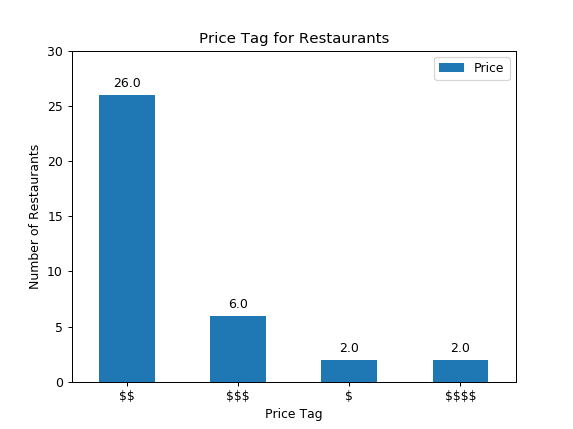

In [33]:
fig4, ax4 = plt.subplots()
fig4.canvas.draw()
restaurant_5_mile_radius.Price.value_counts().reset_index().plot(kind='bar', ax=ax4);

labels = [item.get_text() for item in ax4.get_xticklabels()]
labels[0] = "$\$"
labels[1] = "$\$\$"
labels[3] = "$\$\$\$"
labels[2] = "$"

def add_value_labels(ax4, spacing=4):

    for rect in ax4.patches:
       
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        va = "bottom"
    
        if y_value < 0:
            space *= -1
            va = "top"
            
        label = "{:.1f}".format(y_value)

        ax4.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)                     
        
add_value_labels(ax4);

ax4.set_xlabel("Price Tag");
ax4.set_ylabel("Number of Restaurants");
ax4.set_title("Price Tag for Restaurants");
ax4.set_ylim(0,30)
ax4.xaxis.set_tick_params(rotation=0);
ax4.set_xticklabels(labels);
fig4.savefig("Price Tag for Restaurants.png")

<b>Type of Cuisine</b>

In [20]:
restaurant_5_mile_radius.Cuisine.value_counts()

Italian                   7
American (New)            4
Mexican                   3
Mediterranean             2
American (Traditional)    2
Steakhouses               2
Japanese                  2
Soul Food                 2
Seafood                   2
Teppanyaki                1
Lounges                   1
Burmese                   1
Southern                  1
Puerto Rican              1
Brazilian                 1
Sandwiches                1
Filipino                  1
Ramen                     1
Indian                    1
Caterers                  1
Thai                      1
Barbeque                  1
Vietnamese                1
New Mexican Cuisine       1
Hot Dogs                  1
Cocktail Bars             1
French                    1
Middle Eastern            1
Gastropubs                1
Name: Cuisine, dtype: int64

In [21]:
replacements = {"Italian": "European", "American (New)": "N. American", "Cocktail Bars": "Bars/Other",
                "Soul Food": "N. American", "Mexican": "Latin", "American (Traditional)": "N. American",
                "French": "European", "Seafood": "N. American", "Southern": "N. American", "Filipino": "Asian",
                "Puerto Rican": "Latin", "Brazilian": "Latin", "Vietnamese": "Asian", "Burmese": "Asian",
                "Japanese": "Asian", "Steakhouses": "N. American", "Lounges": "Bars/Other", "Hot Dogs": "N. American",
                "Barbeque": "N. American", "Gastropubs": "Bars/Other", "Mediterranean": "European", "Caterers": "Bars/Other",
                "Middle Eastern": "Asian", "New Mexican Cuisine": "Latin", "Sandwiches": "European", "Teppanyaki": "Asian",
                "Ramen": "Asian", "Indian":"Asian", "Thai":"Asian"}

In [22]:
restaurant_5_mile_radius.Cuisine = restaurant_5_mile_radius.Cuisine.replace(replacements)
restaurant_cuisine_values = restaurant_5_mile_radius.Cuisine.value_counts()
restaurant_cuisine_values

N. American    15
European       11
Asian          10
Latin           6
Bars/Other      4
Name: Cuisine, dtype: int64

<IPython.core.display.Javascript object>


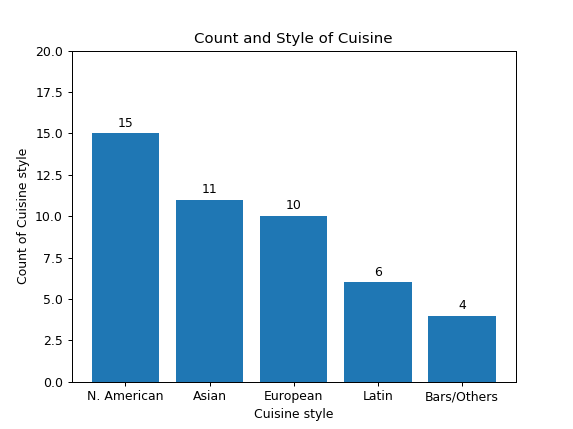

In [23]:
fig5, ax5 = plt.subplots()
restaurant_cuisine_values
x = np.arange(5)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax5.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
chart = ax5.bar(x, restaurant_cuisine_values)

autolabel(chart);

ax5.set_ylim(0,20);

labels = ["","N. American","Asian","European","Latin","Bars/Others"]

ax5.set_xticklabels(labels);
ax5.set_title("Count and Style of Cuisine");
ax5.set_ylabel("Count of Cuisine style");
ax5.set_xlabel("Cuisine style");
fig5.savefig("Count and Style of Cuisine.png")

#### Accessibility of food source Catering and Delivery

In [24]:
restaurant_5_mile_radius.Delivery.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[delivery]                                    21
[]                                            12
[pickup, delivery]                             7
[restaurant_reservation, pickup, delivery]     2
[restaurant_reservation]                       2
[restaurant_reservation, delivery]             1
[pickup, restaurant_reservation]               1
Name: Delivery, dtype: int64

<IPython.core.display.Javascript object>


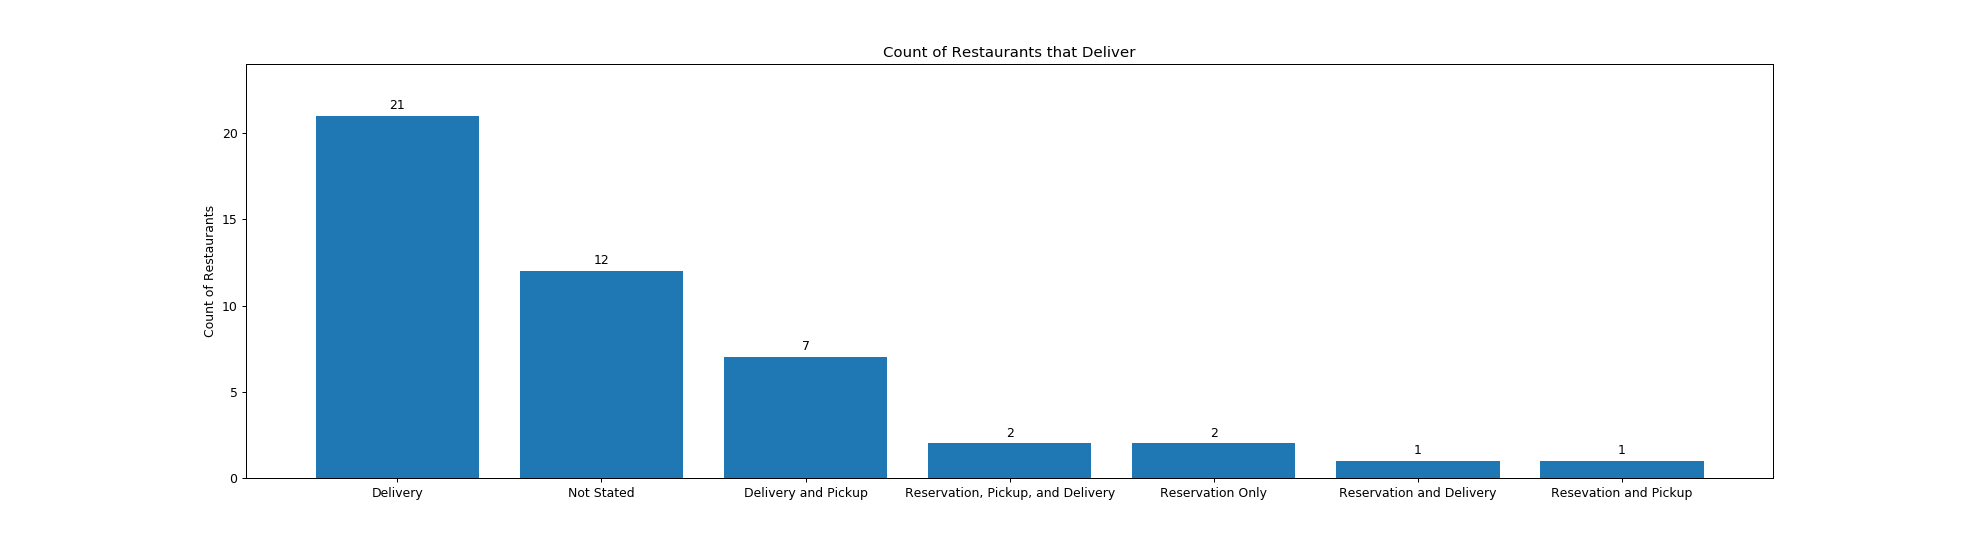

In [34]:
delivery_for_restaurants_stats = restaurant_5_mile_radius.Delivery.value_counts()

x = np.arange(7)

fig1, ax1 = plt.subplots(figsize = (22,6))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

chart = ax1.bar(x, delivery_for_restaurants_stats);

autolabel(chart);

ax1.set_ylim(0,24);

ax1.set_xticklabels(['','Delivery', 'Not Stated', 'Delivery and Pickup', 'Reservation, Pickup, and Delivery', 'Reservation Only', 
                     'Reservation and Delivery', 'Resevation and Pickup']);

ax1.set_ylabel('Count of Restaurants');

ax1.set_title('Count of Restaurants that Deliver');
fig1.savefig('Count of Restaurants that Deliver.png')

#### Partnership desirability: Restaurant popularity

In [26]:
restaurant_delivery_df = restaurant_5_mile_radius.loc[
    (restaurant_5_mile_radius.astype(str)['Delivery'] != '[]') 
    | (restaurant_5_mile_radius.astype(str)['Delivery'] == """['delivery']""")
]
restaurant_delivery_df.head(1)

restaurant_delivery_and_review_df = restaurant_delivery_df.sort_values(by = ['Review'], ascending = True)

In [27]:
restaurant_delivery_df.sort_values(by = ['Review'], ascending = False).head(10)

,Restaurant,Address,Latitude,Longitude,Distance(mi),Cuisine,Rating,Review,Delivery,Price
35,Bottega Louie,700 S Grand Ave,34.046930,-118.256601,2.490,European,4.0,16894,[delivery],$$
16,Wurstküche,800 E 3rd St,34.045605,-118.236061,2.289,N. American,4.0,8281,"[pickup, delivery]",$$
45,Howlin' Ray's,727 N Broadway,34.061517,-118.239716,3.216,N. American,4.5,6152,[delivery],$$
2,Bestia,2121 E 7th Pl,34.034020,-118.229190,1.749,European,4.5,6078,[delivery],$$$
36,Marugame Monzo,329 E 1st St,34.050023,-118.239935,2.527,Asian,4.5,3675,[delivery],$$
31,Maccheroni Republic,332 S Broadway,34.050039,-118.248552,2.552,European,4.0,2909,"[pickup, delivery]",$$
49,Faith & Flower,705 W 9th St,34.046195,-118.261698,2.572,N. American,4.0,2489,[delivery],$$$
40,The Boiling Crab,3377 Wilshire Blvd,34.062425,-118.297671,4.660,N. American,4.0,2322,[delivery],$$
41,71 Above,633 W 5th St,34.051120,-118.254322,2.687,N. American,4.0,1865,[delivery],$$$$
33,Little Sister,523 W 7th St,34.047215,-118.256196,2.498,Asian,4.0,1562,[delivery],$$


<IPython.core.display.Javascript object>


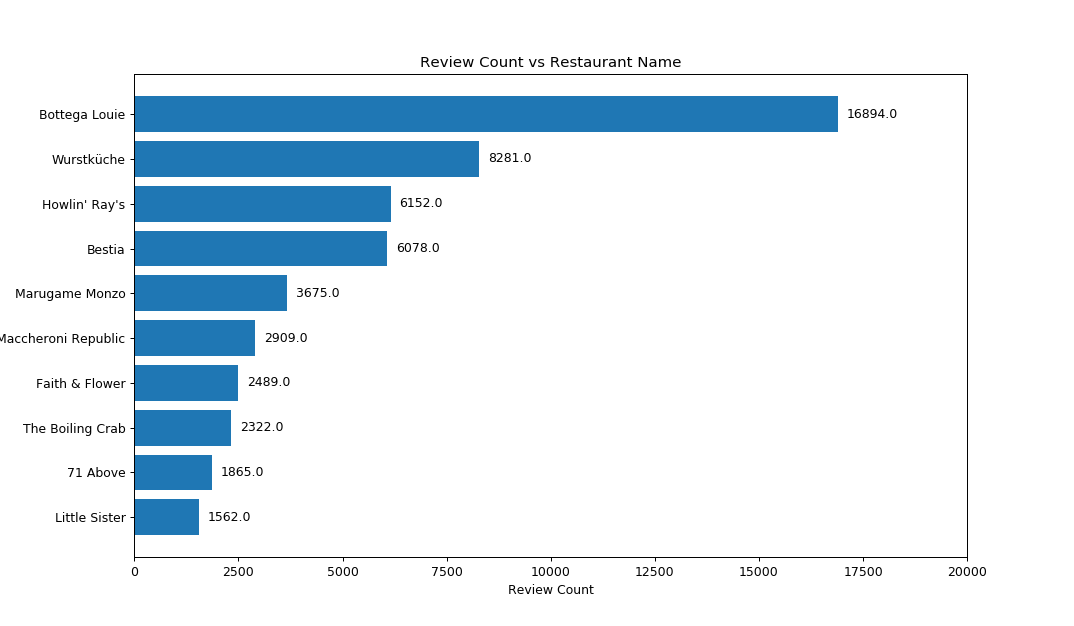

In [28]:
y = restaurant_delivery_and_review_df.Review
restaurant_name = restaurant_delivery_and_review_df.Restaurant

fig2, ax2 = plt.subplots(figsize=(12,7))

ax2.barh(restaurant_name[-10:], y[-10:])
ax2.set_xlabel("Review Count")
ax2.set_ylabel("Restuarant Name")
ax2.set_xlim(0,20000)
# ax.xaxis.set_tick_params(rotation=90)
ax2.set_title("Review Count vs Restaurant Name")

rects = ax2.patches

for rect in rects:

    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
    space = 7
    ha = 'left'
    
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.1f}".format(x_value)
    
    plt.annotate(
        label,                     
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)
    
fig2.savefig("Review Count vs Restaurant Name.png")

### Plotting and Making sense of the Grocery Store Data 

#### Supermarkets that Deliver

In [35]:
supermarkets_5_mile_radius.Delivery.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                    30
[delivery, pickup]     2
[delivery]             1
Name: Delivery, dtype: int64

<IPython.core.display.Javascript object>


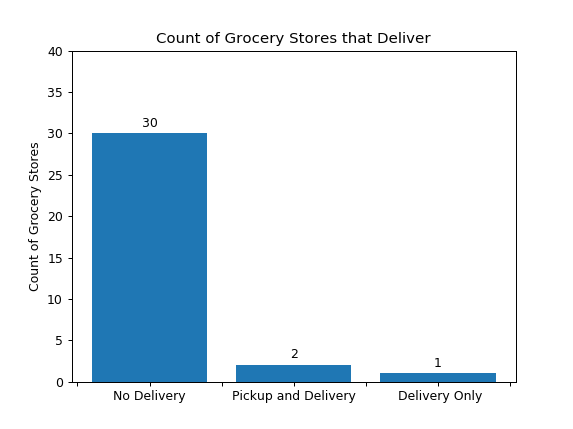

In [29]:
supermarket_delivery_values = supermarkets_5_mile_radius.Delivery.value_counts()

x = np.arange(3)

fig3, ax3 = plt.subplots()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax3.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

chart = ax3.bar(x,supermarket_delivery_values)

autolabel(chart)

ax3.set_ylim(0,40)
ax3.set_xticklabels(['','','No Delivery','','Pickup and Delivery','',' Delivery Only']);
ax3.set_ylabel('Count of Grocery Stores');
ax3.set_title('Count of Grocery Stores that Deliver');
fig3.savefig('Count of Grocery Stores that Deliver.png')

#### Partnership desirability: Supermarket popularity

In [30]:
supermarkets_5_mile_radius.Review

supermarkets_delivery_df = supermarkets_5_mile_radius.loc[
    (supermarkets_5_mile_radius.astype(str)['Delivery'] != '[]')
]
supermarkets_delivery_df

,Supermarket,Address,Latitude,Longitude,Rating,Review,Delivery,Price
15,Grow DTLA,300 S Santa Fe Ave,34.045259,-118.232425,4.0,56,"[delivery, pickup]",$$
31,Fisherman's Outlet,529 S Central Ave,34.040830,-118.240180,4.0,1117,[delivery],$$
45,Mrs. Winstons - LA's Best Salad & Juice Bar,888 S Figueroa St,34.046810,-118.261720,4.5,66,"[delivery, pickup]",$$


# Conclusion

We managed to obtain Restaurant and Grocery Store/Supermarket data via the Yelp API. We were limited to 50 hits.  
We filtered the data within a 5 mile radius of the desired food bank.  We managed to visualise the data to determine our goals thtough Matplotlib, Seaborn, and Gmaps. We found the the popularity of the restaurants and grocery stores throuh Pandas.